In [2]:
import os
import glob
import pandas as pd
import argparse
import xml.etree.ElementTree as ET

In [1]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                    int(root.find('size')[0].text),
                    int(root.find('size')[1].text),
                    member[0].text,
                    int(member[4][0].text),
                    int(member[4][1].text),
                    int(member[4][2].text),
                    int(member[4][3].text)
                    )
            xml_list.append(value)

    column_name = ['filename', 'width', 'height', 'cell_type', 'xmin', 'ymin', 'xmax', 'ymax']

    xml_df = pd.DataFrame(xml_list, columns=column_name)

    for i in range(len(xml_df['filename'])):
        if '.jpg' not in xml_df.filename[i]:
            xml_df.filename[i] = xml_df.filename[i] + '.jpg'
    return xml_df

In [3]:
path = './BCCD-RBC-WBC-differentiation/Annotations/'

In [4]:
df = xml_to_csv(path)

In [5]:
df.head()

,filename,width,height,cell_type,xmin,ymin,xmax,ymax
0,BloodImage_00000.jpg,640,480,WBC,260,177,491,376
1,BloodImage_00000.jpg,640,480,RBC,78,336,184,435
2,BloodImage_00000.jpg,640,480,RBC,63,237,169,336
3,BloodImage_00000.jpg,640,480,RBC,214,362,320,461
4,BloodImage_00000.jpg,640,480,RBC,414,352,506,445


In [7]:
import cv2
import matplotlib.pyplot as plt

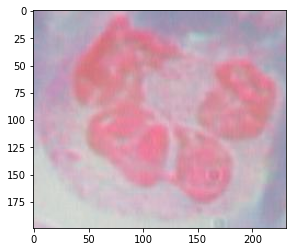

In [46]:
def crop_to_WBC_Img(df, path, img_name):
    img = cv2.imread(path + img_name)
    plt.imshow(img)
    img_data = df[(df['filename'] == img_name) & (df['cell_type'] == 'WBC')]
    xmin = img_data['xmin'][0]
    xmax = img_data['xmax'][0]
    ymin = img_data['ymin'][0]
    ymax = img_data['ymax'][0]
    cropped_img = img[ymin:ymax, xmin:xmax]
    plt.imshow(cropped_img)
    return

crop_to_WBC_Img(df, './BCCD-RBC-WBC-differentiation/JPEGImages/', 'BloodImage_00000.jpg')